# Time Series Forecast - LiveStock Data(fpp package)

In [2]:
#Install/load and read data
#install.packages("fpp")
library(fpp)

Loading required package: forecast
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Loading required package: fma
Loading required package: expsmooth
Loading required package: lmtest
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: tseries


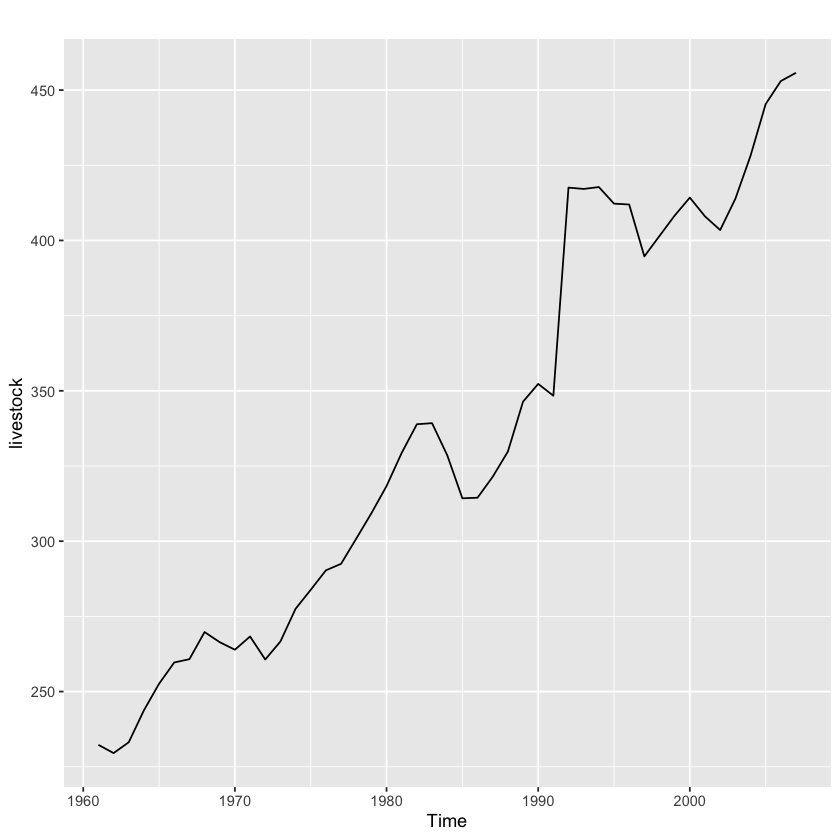

In [3]:
#load the dataset
data('livestock')

#data analysis
autoplot(livestock)

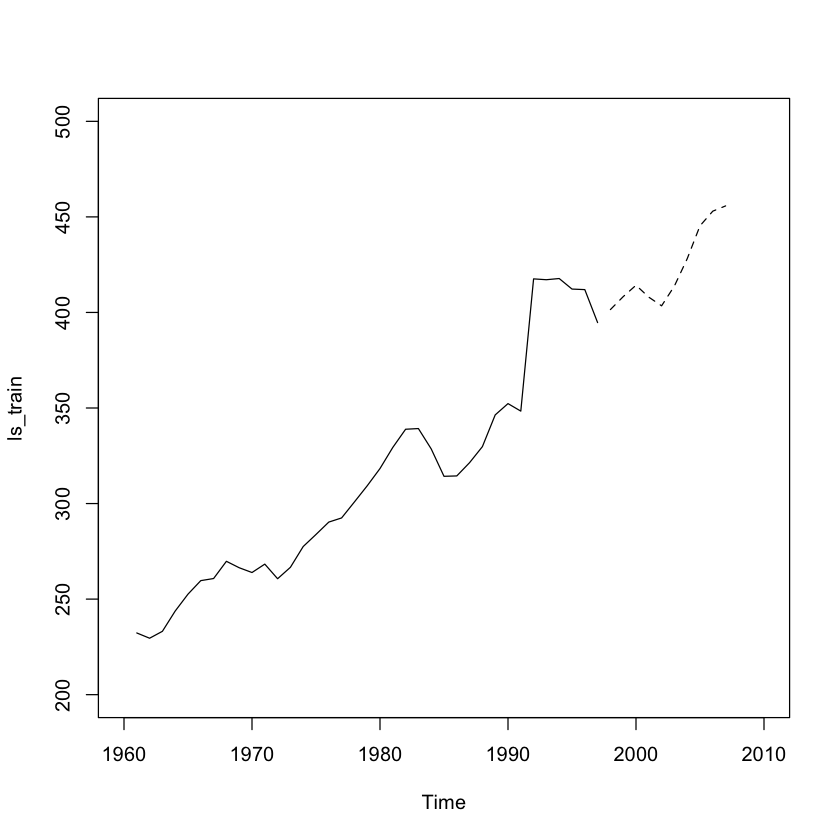

In [4]:
#separate the training and testing data
ls_train=head(livestock,n = length(livestock)-10)
ls_test=tail(livestock,n=10)

#plot train-test data
plot(ls_train,xlim=c(1960,2010),ylim=c(200,500))
lines(ls_test,lty=2)

In [5]:
#compare the 3 models
SES=ses(ls_train,h=10,alpha=NULL)
print(sqrt(mean((SES$mean-ls_test)^2)))
h=holt(ls_train,h=10,alpha=NULL,beta=NULL)
print(sqrt(mean((h$mean-ls_test)^2)))
hd=holt(ls_train,h=10,alpha=NULL,beta=NULL,damped=TRUE)
print(sqrt(mean((hd$mean-ls_test)^2)))

[1] 34.69384
[1] 10.20587
[1] 23.52408


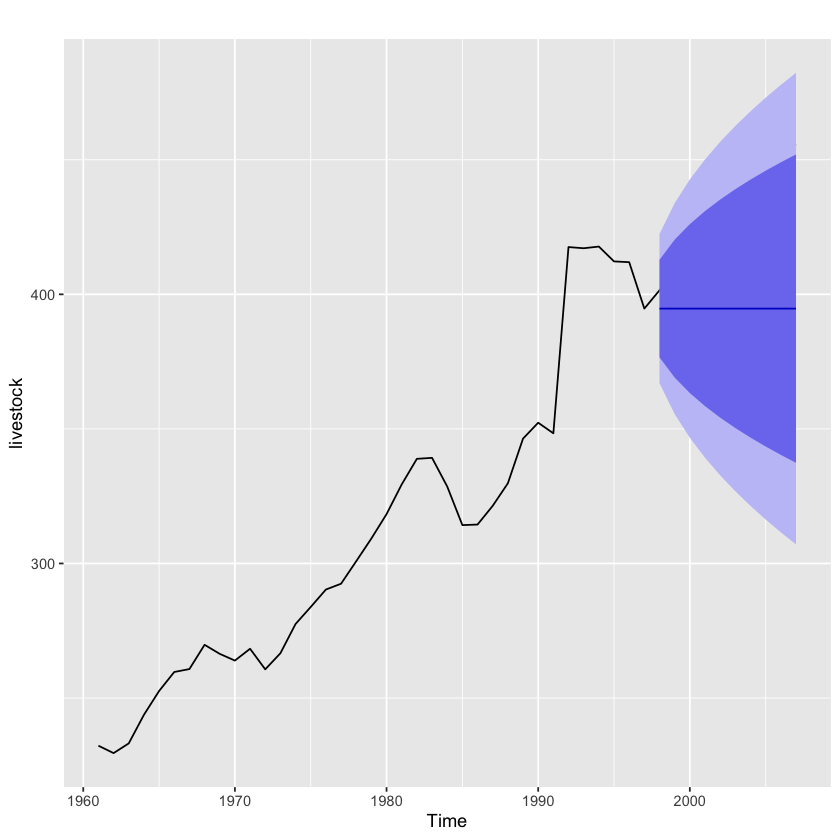

In [10]:
#plot - Simple Exponential Smoothing
autoplot(livestock) + autolayer(SES)

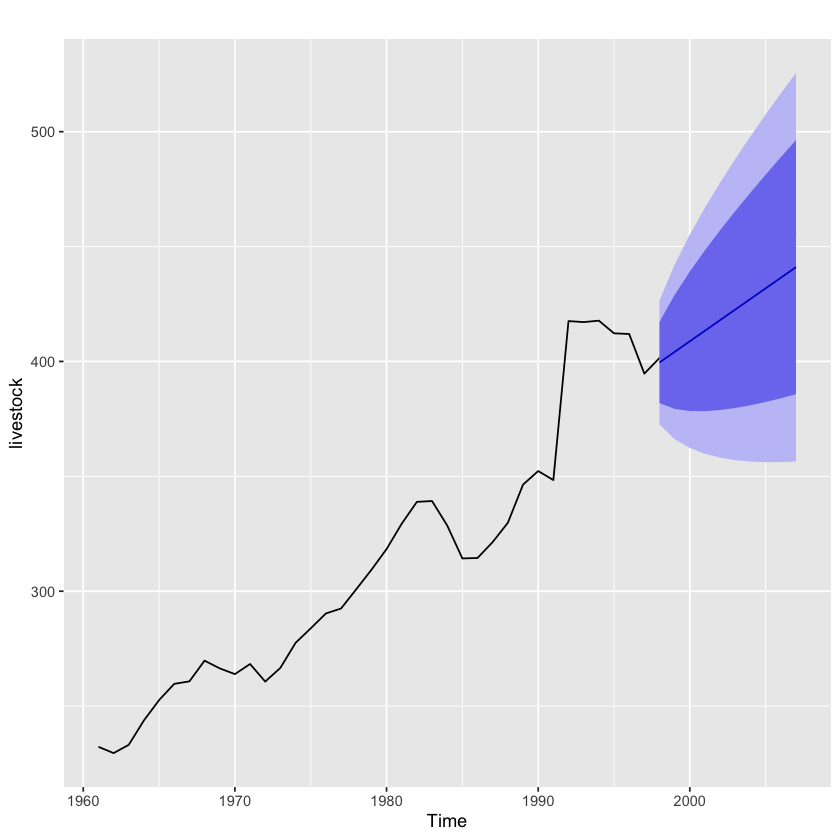

In [11]:
#plot - Non seasonal Holt-Winters smoothing(linear trend)
autoplot(livestock) + autolayer(h)

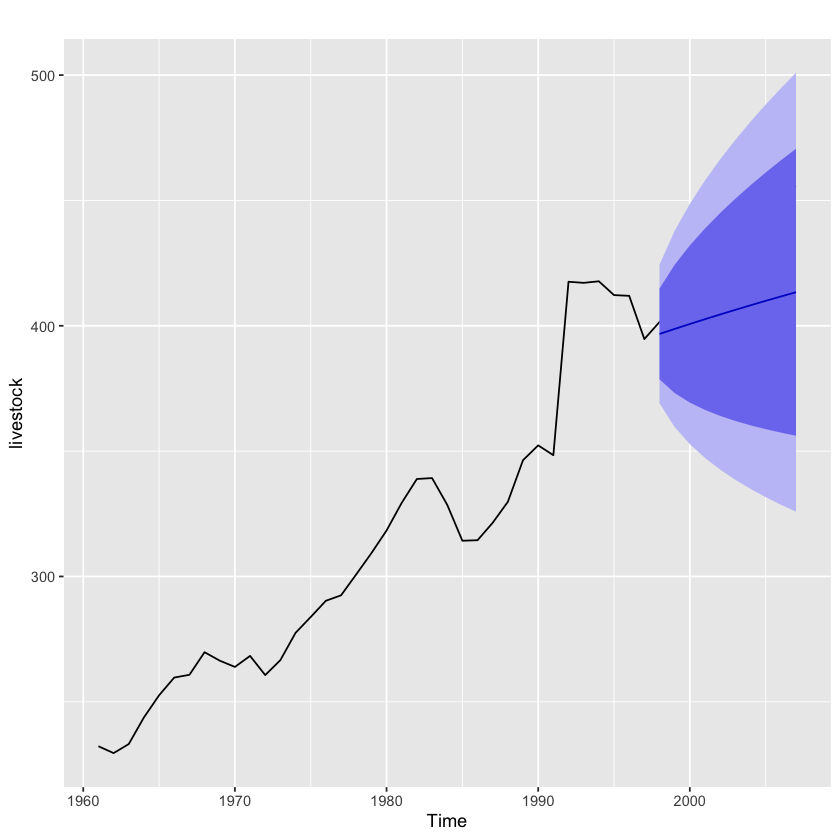

In [12]:
#plot - Non seasonal Holt-Winters smoothing(damped=TRUE)
autoplot(livestock) + autolayer(hd)